**Question 1** : In the folowing definition of a probabilistic model:

$Y \sim \mathcal{N}(\mu, \sigma)$

$\mu \sim \mathcal{N}(0, 2)$

$\sigma \sim \mathcal{halfnormal}(0.75)$

1.1 - Identify the prior and the likelihood.

1.2  - How many parameters will the posterior have?

1.3 - Compare it with the model for the coin-flipping problem.

1.4 - Write Bayes' theorem for the model.


1.1) Likelihood: $Y \sim \mathcal{N}(\mu, \sigma)$

Priors:  $\mu \sim \mathcal{N}(0, 2)$

$\quad \quad \sigma \sim \text{HalfNormal}(0.75)$

1.2)The posterior distribution will have two parameters, $\sigma$ and $\mu$.

1.3) For the coin flipping model the prior was a beta distribution while the likelihood was binomail because of only two possible outcomes. It had only parameter (p) that was the probability of getting a head(success).

1.4)$$P(\mu, \sigma \mid Y) = \frac{P(Y \mid \mu, \sigma) \cdot P(\mu) \cdot P(\sigma)}{P(Y)}$$

In [ ]:
## Use Latex to write mathematical equations in markdown

**Question 2**

Let’s suppose that we have two coins; when we toss the first coin, half of the time it lands on tails
 and half of the time on heads. The other coin is a loaded coin that always lands on heads. If we take
 one of the coins at random and get a head, what is the probability that this coin is the unfair one?

Ans) **Events:**

* **A:** Getting a head
* **B:** It is an unfair coin

**Conditional Probability:**

$$P(B \mid A)=\frac{P(A \mid B) \cdot P(B)}{P(A)}$$
$$=\frac{1 \cdot 1/2}{3/4}$$
$$=\frac{2}{3}$$




**Question 3**


Using PyMC, change the parameters of the prior Beta distribution in `our_first_model` to match those of Week 2. Compare the results.

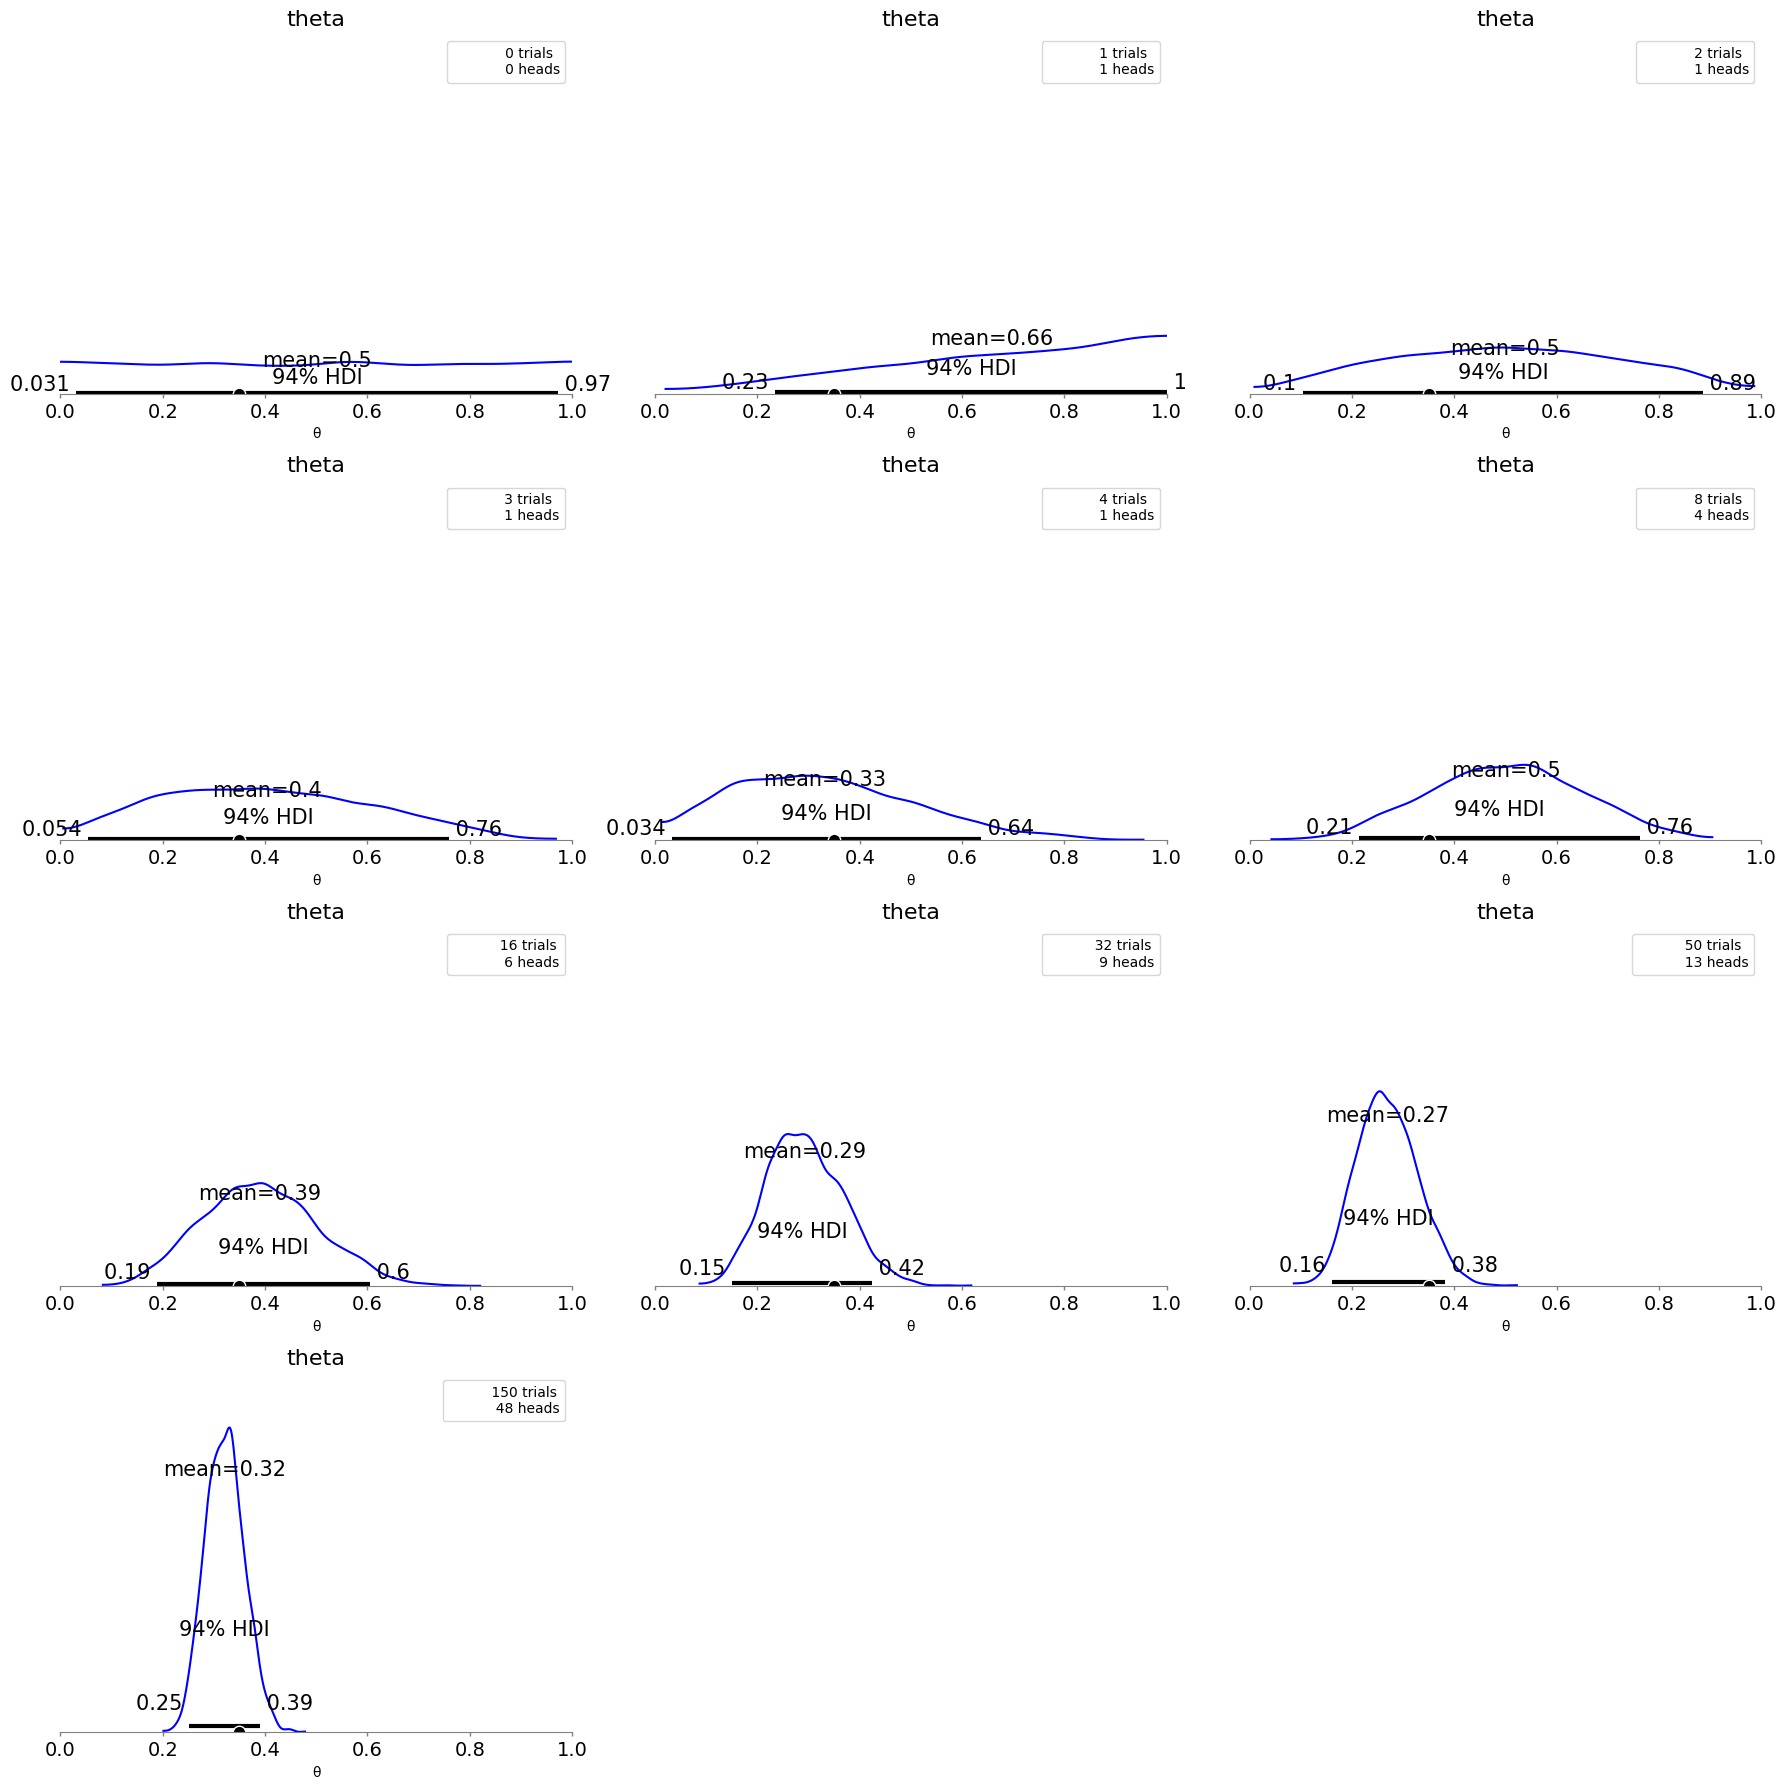

In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
alpha_prior, beta_prior = 1,1
# Create a figure
plt.figure(figsize=(18,18))


for idx, (N, y) in enumerate(zip(n_trials, n_heads)):
    plt.subplot(4, 3, idx + 1)
    plt.xlabel('θ', fontsize=10)
    plt.xticks(fontsize=8)
    with pm.Model() as model:
        theta = pm.Beta('theta', alpha=alpha_prior + y, beta=beta_prior + N - y)
        trace = pm.sample(2000, tune=1000, return_inferencedata=True)

    az.plot_posterior(trace, var_names=['theta'], color='blue', round_to=2, ax=plt.gca())  # Remove HDI, show only mode

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend(loc='upper right')
    plt.yticks([])

plt.tight_layout()
plt.show()


The width of the graphs reduces as the number of trials increases and we get a more accurate mean.